In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [24]:
keras.__version__

'2.2.4-tf'

In [5]:
tf.__version__

'2.0.0-rc1'

In [12]:
pip install --upgrade tensorflow==2.0.0-rc1

Requirement already up-to-date: tensorflow==2.0.0-rc1 in e:\anaconda3\lib\site-packages (2.0.0rc1)
Note: you may need to restart the kernel to use updated packages.


In [2]:
tf.__version__

'2.0.0-rc1'

In [11]:
--user

NameError: name 'user' is not defined

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

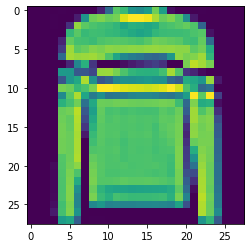

In [5]:
plt.imshow(X_train[5])

In [6]:
y_train[9]

5

In [7]:
class_name = ["T-shirt/top","Trouser","Pull over","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [8]:
class_name[y_train[5]]

'Pull over'

In [9]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

In [10]:
#DATA NORMALIZATION - Normalize the data so that they are of approximately the same scale

In [11]:
X_train_n=X_train/255.
X_test_n=X_test/255.

In [12]:
X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train[:5000],y_train[5000:]
X_test=X_test_n

In [13]:
X_valid

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
#FEATURE SCALING
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
#FEATURE SCALING
np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#28*28 pixels as input
model.add(keras.layers.Dense(300, activation="relu"))#hidde layer 1
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
import pydot

In [24]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [31]:
weights,biases=model.layers[1].get_weights()

In [32]:
weights

array([[ 0.03574536, -0.02389931,  0.01030421, ..., -0.06151724,
        -0.0451347 ,  0.03140047],
       [-0.05467119,  0.04656268, -0.07248728, ..., -0.07038655,
        -0.03083268, -0.06513114],
       [-0.03234808, -0.00317231,  0.04102226, ..., -0.03237895,
         0.01965773, -0.00825518],
       ...,
       [-0.0630435 ,  0.07371157, -0.05752673, ...,  0.07049479,
         0.05577183, -0.02518321],
       [-0.02547856,  0.07304457,  0.04983643, ..., -0.05780029,
         0.07438232, -0.0286764 ],
       [-0.02862201,  0.01245171, -0.04573321, ...,  0.04891213,
        -0.06256616, -0.02975626]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [39]:
#compilation
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [41]:
model_history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 125s 2ms/sample - loss: 0.7010 - accuracy: 0.7697 - val_loss: 0.5241 - val_accuracy: 0.8164
Epoch 2/20
55000/55000 [==============================] - 8s 142us/sample - loss: 0.4851 - accuracy: 0.8311 - val_loss: 0.4541 - val_accuracy: 0.8434
Epoch 3/20
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4407 - accuracy: 0.8458 - val_loss: 0.4148 - val_accuracy: 0.8594
Epoch 4/20
55000/55000 [==============================] - 8s 138us/sample - loss: 0.4158 - accuracy: 0.8559 - val_loss: 0.3918 - val_accuracy: 0.8646
Epoch 5/20
55000/55000 [==============================] - 7s 133us/sample - loss: 0.3960 - accuracy: 0.8619 - val_loss: 0.3971 - val_accuracy: 0.8646
Epoch 6/20
55000/55000 [==============================] - 7s 132us/sample - loss: 0.3802 - accuracy: 0.8662 - val_loss: 0.3724 - val_accuracy: 0.8724
Epoch 7/20
55000/55000 [===========================

In [42]:
model.history.params
model_history.history


{'loss': [0.7010451033895666,
  0.4850833336656744,
  0.44069124013293876,
  0.415789866065979,
  0.39598041801019146,
  0.3802007402506742,
  0.36764141556132923,
  0.3550083735184236,
  0.34381274848417803,
  0.33483291662172837,
  0.3273857706113295,
  0.31919015391523187,
  0.31149941537596965,
  0.3057563776883212,
  0.29875189427245746,
  0.2922807435317473,
  0.28617508980794387,
  0.2802612973397428,
  0.27605901486873624,
  0.2716364706678824],
 'accuracy': [0.7697091,
  0.83114547,
  0.84583634,
  0.85594547,
  0.8618909,
  0.8661818,
  0.8706909,
  0.87383634,
  0.8792545,
  0.88134545,
  0.8836,
  0.88603634,
  0.8895818,
  0.8907818,
  0.8934,
  0.8946,
  0.8960182,
  0.8989818,
  0.9011818,
  0.9022909],
 'val_loss': [0.5240897146701813,
  0.45412474155426025,
  0.41475002422332763,
  0.39183935298919675,
  0.3971447295308113,
  0.3724467902302742,
  0.37059335454702375,
  0.36359771881103514,
  0.36794286521673203,
  0.34815542784929276,
  0.3436891770720482,
  0.3377278

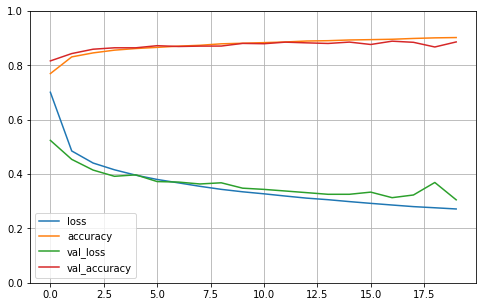

In [43]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3394368682146072, 0.8769]

In [45]:
X_new=X_test[:3]

In [53]:
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [46]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [49]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pull over', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


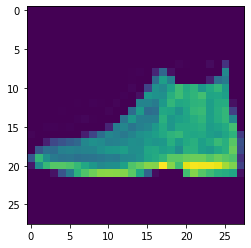

In [51]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


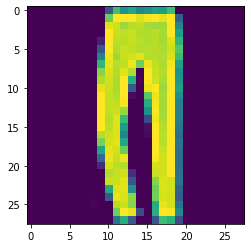

In [52]:
print(plt.imshow(X_test[2]))

In [54]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [55]:
X_train_n=X_train/255.
X_test_n=X_test/255.

In [56]:
X_valid,X_train = X_train_n[:6000],X_train_n[6000:]
y_valid,y_train = y_train[:6000],y_train[6000:]
X_test=X_test_n

In [57]:

np.random.seed(42)
tf.random.set_seed(42)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))#28*28 pixels as input
model.add(keras.layers.Dense(200, activation="relu"))#hidde layer 1
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [58]:
#compilation
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [59]:
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Train on 54000 samples, validate on 6000 samples
Epoch 1/60
54000/54000 [==============================] - 15s 280us/sample - loss: 0.7477 - accuracy: 0.7586 - val_loss: 0.5696 - val_accuracy: 0.8013
Epoch 2/60
54000/54000 [==============================] - 7s 121us/sample - loss: 0.4979 - accuracy: 0.8274 - val_loss: 0.4602 - val_accuracy: 0.8423
Epoch 3/60
54000/54000 [==============================] - 7s 122us/sample - loss: 0.4519 - accuracy: 0.8422 - val_loss: 0.4487 - val_accuracy: 0.8468
Epoch 4/60
54000/54000 [==============================] - 7s 122us/sample - loss: 0.4238 - accuracy: 0.8513 - val_loss: 0.4077 - val_accuracy: 0.8585
Epoch 5/60
54000/54000 [==============================] - 6s 103us/sample - loss: 0.4040 - accuracy: 0.8576 - val_loss: 0.4055 - val_accuracy: 0.8567
Epoch 6/60
54000/54000 [==============================] - 6s 118us/sample - loss: 0.3878 - accuracy: 0.8639 - val_loss: 0.3963 - val_accuracy: 0.8615
Epoch 7/60
54000/54000 [==========================

Epoch 50/60
54000/54000 [==============================] - 6s 118us/sample - loss: 0.1746 - accuracy: 0.9377 - val_loss: 0.3082 - val_accuracy: 0.8903
Epoch 51/60
54000/54000 [==============================] - 6s 117us/sample - loss: 0.1722 - accuracy: 0.9385 - val_loss: 0.3120 - val_accuracy: 0.8923
Epoch 52/60
54000/54000 [==============================] - 6s 116us/sample - loss: 0.1704 - accuracy: 0.9391 - val_loss: 0.3240 - val_accuracy: 0.8915
Epoch 53/60
54000/54000 [==============================] - 6s 115us/sample - loss: 0.1671 - accuracy: 0.9401 - val_loss: 0.3290 - val_accuracy: 0.8898
Epoch 54/60
54000/54000 [==============================] - 6s 117us/sample - loss: 0.1652 - accuracy: 0.9415 - val_loss: 0.3403 - val_accuracy: 0.8795
Epoch 55/60
54000/54000 [==============================] - 6s 117us/sample - loss: 0.1629 - accuracy: 0.9412 - val_loss: 0.3080 - val_accuracy: 0.8937
Epoch 56/60
54000/54000 [==============================] - 6s 118us/sample - loss: 0.1601 - ac

In [60]:
model.history.params
model_history.history


{'loss': [0.7477035016660337,
  0.4978711307225404,
  0.45189947177745676,
  0.4238394270870421,
  0.4040346576240328,
  0.387821650341705,
  0.3740158403449588,
  0.36227716120525644,
  0.3535988017497239,
  0.34309022585771703,
  0.33535436155619447,
  0.32617926344165094,
  0.31847290269092277,
  0.31088591891306416,
  0.30551586887681925,
  0.29903283566236494,
  0.29247527734880097,
  0.28785630202293394,
  0.28247457708915075,
  0.27716813321687556,
  0.2720008968280421,
  0.2672697292654603,
  0.26206662247357543,
  0.2590818886359533,
  0.2544924713086199,
  0.2510678338099409,
  0.24590649062395095,
  0.2428623143710472,
  0.23876337375464263,
  0.2343593207211406,
  0.229366269464846,
  0.22767964156910225,
  0.22435895819686077,
  0.2203115202585856,
  0.21762695996960005,
  0.21426225043778066,
  0.21196215359149156,
  0.208366506802815,
  0.20572770951191585,
  0.2013217123526114,
  0.19920479067608163,
  0.19632346693233207,
  0.1936196430248243,
  0.19197089093040537,
  

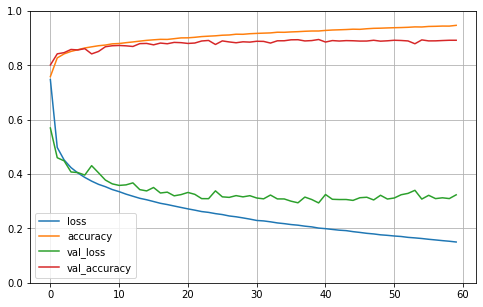

In [61]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [62]:
X_new=X_test[:5]
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1, 1, 6], dtype=int64)